# **OLA Driver Churn Analysis**

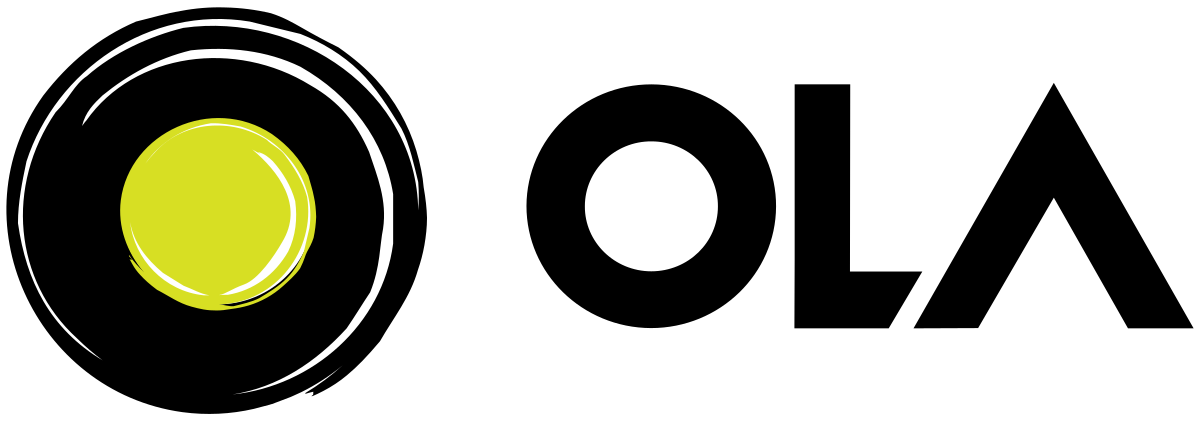

## ***--> Company Introduction***
##### OLA is a popular ride-hailing service in India, founded in 2010. It provides convenient transportation options through its easy-to-use app, connecting riders with various vehicles, from cars to autos. OLA aims to make travel safe, affordable, and accessible for everyone.

## ***--> Problam Statement***
##### Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.
##### As a Data Analyst with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes.

## ***--> Data Over View***
  - MMMM-YY: Reporting Date (Monthly)
  - Driver_ID: Unique ID for drivers
  - Age: Age of the driver
  - Gender: Gender of the driver (Male: 0, Female: 1)
  - City: City Code of the driver
  - Education_Level: Education level (0 for 10+, 1 for 12+, 2 for graduate)
  - Income: Monthly average Income of the driver
  - Date Of Joining: Joining date for the driver
  - LastWorkingDate: Last date of working for the driver
  - Joining Designation: Designation of the driver at joining
  - Grade: Grade of the driver at reporting
  - Total Business Value: Total business value acquired (negative indicates
cancellation/refund or car EMI adjustments)
  - Quarterly Rating: Quarterly rating of the driver (1-5, higher is better)


## ***--> Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## ***--> Import Dataset***

In [2]:
ola_drivers= pd.read_csv(r'D:\Intership\Ola\ola_driver.csv')

In [3]:
ola_drivers.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
# Drop a unnamed/unwanted column
ola_drivers.drop(columns='Unnamed: 0',axis=1,inplace=True)

## ***--> Data Structure and Overview***

In [5]:
# Number of columns and Rows
print("Shape of dataset",ola_drivers.shape)

print("Number of columns In Ola Dataset:- ",ola_drivers.shape[1])
print("Number of Rows In Ola Dataset:- ",ola_drivers.shape[0])

Shape of dataset (19104, 13)
Number of columns In Ola Dataset:-  13
Number of Rows In Ola Dataset:-  19104


In [6]:
# Data Types of each column
ola_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


##### **Convert The Data into Respective Data Types**

In [7]:
ola_drivers['MMM-YY'] = pd.to_datetime(ola_drivers['MMM-YY'])
ola_drivers['Dateofjoining'] = pd.to_datetime(ola_drivers['Dateofjoining'])
ola_drivers['LastWorkingDate'] = pd.to_datetime(ola_drivers['LastWorkingDate'])

In [8]:
# Missing Values in Dataset
ola_drivers.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

- There are found missing values in `Age`, `Gender` and `LastWorkingDate` columns.
- In `LastWorkingDate` Column  missing values indicate the drivers has not leave the company yet.

## ***--> Descriptive Statistics***

> **Basic Statistics Infomation For numaric columns**

In [9]:
number_vars=ola_drivers.select_dtypes(np.number)
number_vars.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [10]:
number_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


> **Unique Drivers**

In [11]:
print(ola_drivers['Driver_ID'].nunique(),' Number of unique drivers')

2381  Number of unique drivers


>  **Temporal Analysis**

In [12]:
joiner_per_month=ola_drivers.groupby(ola_drivers['Dateofjoining'].dt.to_period('M')).size().reset_index().rename(columns={0:'no_of_joiners'})
joiner_per_month

,Dateofjoining,no_of_joiners
0,2013-04,31
1,2013-05,24
2,2013-06,59
3,2013-07,63
4,2013-08,33
...,...,...
80,2020-08,325
81,2020-09,314
82,2020-10,139
83,2020-11,93


In [13]:
left_per_month=ola_drivers.groupby(ola_drivers['LastWorkingDate'].dt.to_period('M')).size().reset_index().rename(columns={0:'no_of_left_drivers'})
left_per_month

,LastWorkingDate,no_of_left_drivers
0,2018-12,5
1,2019-01,82
2,2019-02,85
3,2019-03,75
4,2019-04,49
5,2019-05,98
6,2019-06,61
7,2019-07,48
8,2019-08,53
9,2019-09,79


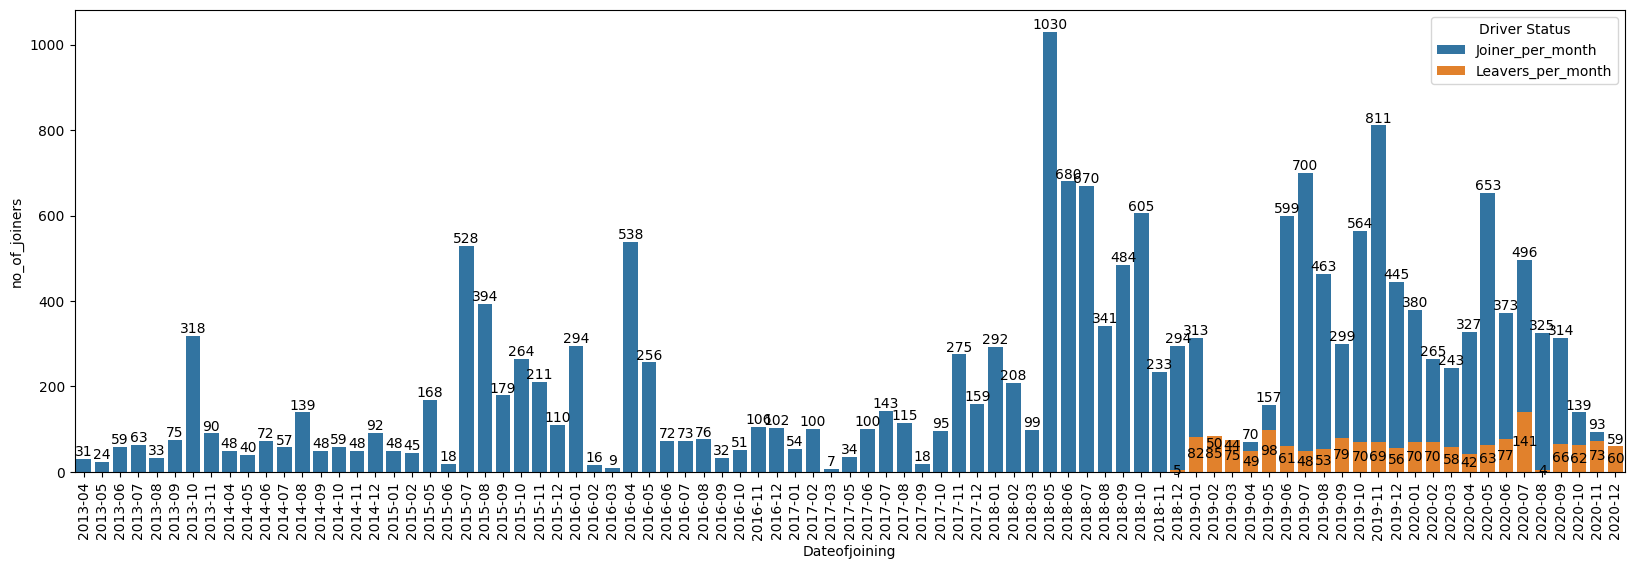

In [14]:
plt.figure(figsize=(20,6))

ax=sns.barplot(data=joiner_per_month,x='Dateofjoining',y='no_of_joiners',label='Joiner_per_month')
ap=sns.barplot(data=left_per_month,x='LastWorkingDate',y='no_of_left_drivers',label='Leavers_per_month')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ap.bar_label(ap.containers[1],label_type='center')
plt.legend(title='Driver Status')
plt.show()

**Insights**
   - There were big increases in new drivers in March 2018, September 2019, and April 2020.
   - The number of drivers leaving each month is low compared to new joiners.

> **Average Tenure of drivers**

In [15]:
ola_drivers['Tenure'] = (ola_drivers['LastWorkingDate'] - ola_drivers['Dateofjoining']).dt.days

print('Average Tenure of drivers',ola_drivers['Tenure'].mean().__round__(2),'Days')

Average Tenure of drivers 357.57 Days


- Average Tenure of drivers has 357.57 days. 


## ***--> Data Preprocessing***

>  #### **Missing Values Handling**

In [16]:
ola_drivers.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
Tenure                  17488
dtype: int64

In [17]:
ola_drivers['Age']=ola_drivers['Age'].fillna(ola_drivers['Age'].mean())
ola_drivers['Gender']=ola_drivers['Gender'].fillna(ola_drivers['Gender'].median())


In [18]:
# fill the Tenure null values as find working days by maximum date in this dataset
max_date= ola_drivers['LastWorkingDate'].max()
max_date


Timestamp('2020-12-28 00:00:00')

In [19]:
ola_drivers['Tenure'] = (ola_drivers['LastWorkingDate'].fillna(max_date)- ola_drivers['Dateofjoining']).dt.days

In [20]:
ola_drivers.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
Tenure                      0
dtype: int64

> #### **Feature Engineering**

In [21]:
ola_drivers['Join_Month'] = ola_drivers['Dateofjoining'].dt.to_period('M')
ola_drivers['Leave_Month'] = ola_drivers['LastWorkingDate'].dt.to_period('M')
ola_drivers['Has_left'] = ola_drivers['LastWorkingDate'].notna().astype(int)


In [22]:
ola_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19104 non-null  float64       
 3   Gender                19104 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Tenure          

> **Creating a new database based on unique `Drive_ID`**
* I have analyzed the data based on unique driver IDs. This analysis includes the percentage of driver churn by gender, age, salary increase, grade rating increase, quarterly increase, and other factors.
* I have using aggrigation function like  `Age`: max,
    `Gender`: first,
    `Education_Level`: last,
    `Income`: last,
    `Joining Designation`: last,
    `Grade`: last,
    `Total Business Value`: sum,
    `Quarterly Rating`: last,
    `LastWorkingDate`: last,
    `City`: first,
    `Dateofjoining`: first

In [23]:
# Creating a blank dataframe
unique_drivers=pd.DataFrame()

In [24]:
# add Columns by aggrgate function
unique_drivers['Driver_ID'] = ola_drivers['Driver_ID'].unique()
unique_drivers['Age'] = list(ola_drivers.groupby('Driver_ID')['Age'].max())
unique_drivers['Gender']=list(ola_drivers.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
unique_drivers['City']=list(ola_drivers.groupby('Driver_ID').agg({'City':'first'})['City'])
unique_drivers['Education_Level'] = list(ola_drivers.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
unique_drivers['Income'] = list(ola_drivers.groupby('Driver_ID').agg({'Income':'last'})['Income'])
unique_drivers['Date_of_joining'] = list(ola_drivers.groupby('Driver_ID').agg({'Dateofjoining':'first'})['Dateofjoining'])
unique_drivers['Last_Working_Date'] = list(ola_drivers.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'])
unique_drivers['Joining_Designation'] = list(ola_drivers.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
unique_drivers['Grade']=list(ola_drivers.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
unique_drivers['Total_Business_Value']=list(ola_drivers.groupby('Driver_ID').agg({'Total Business Value':'sum'})['Total Business Value'])
unique_drivers['Quarterly_Rating']=list(ola_drivers.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])
unique_drivers['Tenure']= (unique_drivers['Last_Working_Date']-unique_drivers['Date_of_joining']).dt.days
unique_drivers['Join_Month'] = unique_drivers['Date_of_joining'].dt.to_period('M')
unique_drivers['Leave_Month'] = unique_drivers['Last_Working_Date'].dt.to_period('M')
unique_drivers['Has_left'] = unique_drivers['Last_Working_Date'].notna().astype(int)

- Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1


In [25]:

first_last_income = ola_drivers.groupby('Driver_ID')['Income'].agg(['first', 'last'])
unique_drivers['Monthly_Income_Increase'] = unique_drivers['Driver_ID'].map((first_last_income['last'] > first_last_income['first']).astype(int))

- Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1


In [26]:

first_last_ratings = ola_drivers.groupby('Driver_ID')['Quarterly Rating'].agg(['first', 'last'])

unique_drivers['Quarterly_Rating_Increase'] = unique_drivers['Driver_ID'].map((first_last_ratings['last'] > first_last_ratings['first']).astype(int))

In [27]:
unique_drivers.shape

(2381, 18)

In [28]:
unique_drivers['Gender'] = unique_drivers['Gender'].astype(int).apply(lambda x: 'Male' if x==0 else 'Female')
unique_drivers['Has_left'] = unique_drivers['Has_left'].astype(int).apply(lambda x: 'Active' if x!=1 else 'Left')

In [29]:
unique_drivers.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Age,2381.0,33.804322,21.0,30.0,33.0,37.0,58.0,5.909102
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
Date_of_joining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
Last_Working_Date,1616,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining_Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.096598,1.0,1.0,2.0,3.0,5.0,0.941522
Total_Business_Value,2381.0,4586741.822764,-1385530.0,0.0,817680.0,4173650.0,95331060.0,9127115.313446
Quarterly_Rating,2381.0,1.427971,1.0,1.0,1.0,2.0,4.0,0.809839


In [30]:
# Numaric Columns
num_col=unique_drivers.select_dtypes('number')
num_col.drop(columns=['Driver_ID'],inplace=True)
num_col.columns

Index(['Age', 'Education_Level', 'Income', 'Joining_Designation', 'Grade',
       'Total_Business_Value', 'Quarterly_Rating', 'Tenure',
       'Monthly_Income_Increase', 'Quarterly_Rating_Increase'],
      dtype='object')

In [31]:
# categorical  and  date columns
cat_col = list(set(unique_drivers.columns).difference(set(num_col)))
cat_col

['Date_of_joining',
 'Last_Working_Date',
 'Has_left',
 'Gender',
 'Leave_Month',
 'Join_Month',
 'City',
 'Driver_ID']

In [32]:
unique_drivers.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Date_of_joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Tenure,Join_Month,Leave_Month,Has_left,Monthly_Income_Increase,Quarterly_Rating_Increase
0,1,28.0,Male,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,77.0,2018-12,2019-03,Left,0,0
1,2,31.0,Male,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,2020-11,NaT,Active,0,0
2,4,43.0,Male,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,142.0,2019-12,2020-04,Left,0,0
3,5,29.0,Male,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,57.0,2019-01,2019-03,Left,0,0
4,6,31.0,Female,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,NaN,2020-07,NaT,Active,0,1


## ***--> Exploratory Data Analysis***

> Distribution of `Age`

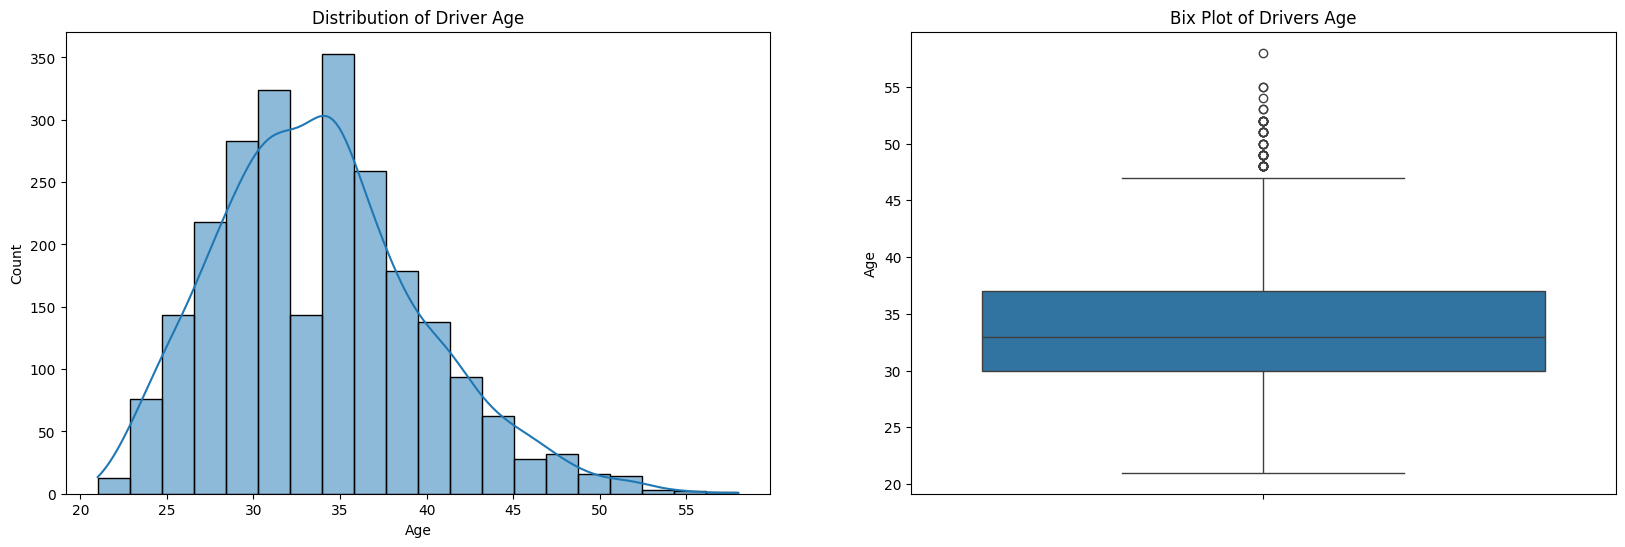

In [33]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(unique_drivers['Age'],kde=True, bins=20)
plt.title('Distribution of Driver Age')

plt.subplot(122)
sns.boxplot(unique_drivers['Age'])
plt.title('Bix Plot of Drivers Age')
plt.show()

 **Insights**
  - The driver `Age` distribution shows most drivers are between 30 and 40 years old, with a few outliers above 50.

> Distribution of `Tenurety` of drivers

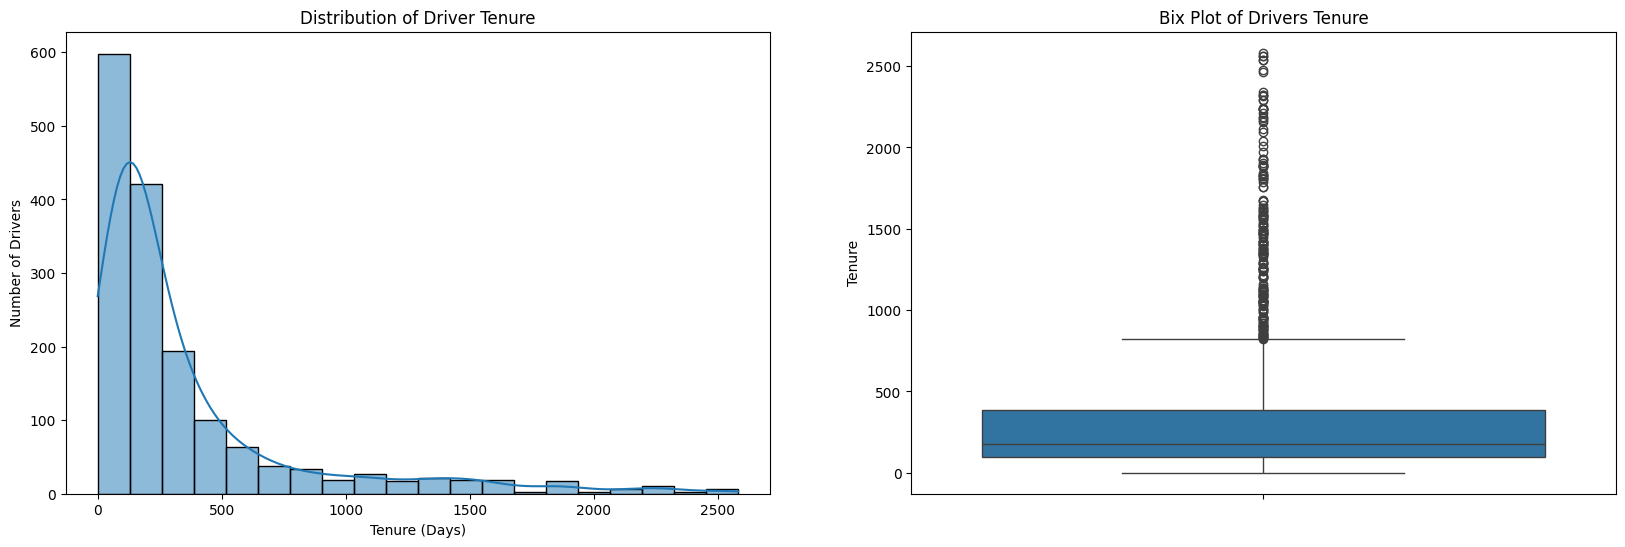

In [34]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(unique_drivers['Tenure'].dropna(), bins=20, kde=True)
plt.title('Distribution of Driver Tenure')
plt.xlabel('Tenure (Days)')
plt.ylabel('Number of Drivers')

plt.subplot(122)
sns.boxplot(unique_drivers['Tenure'])
plt.title('Bix Plot of Drivers Tenure')
plt.show()

 **Insights**
  - Most drivers have a short tenure, with the largest number of drivers having less than 500 days.

 > Distribution of `Income`

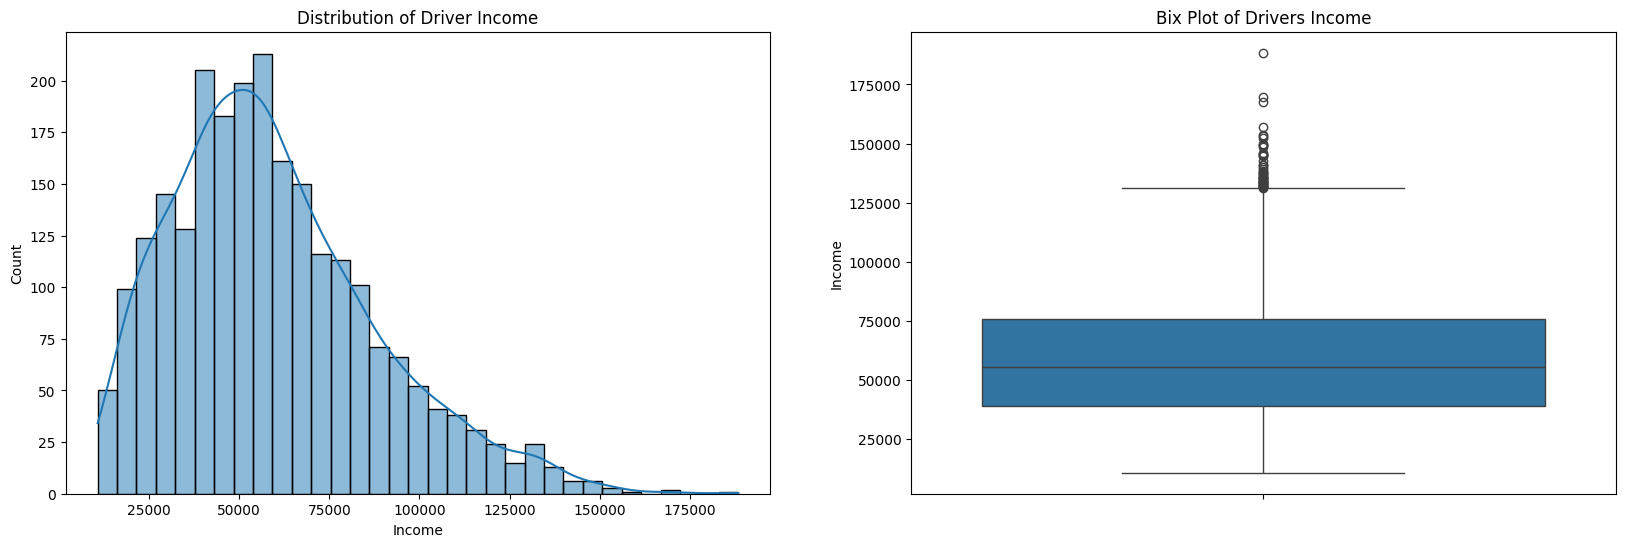

In [35]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(unique_drivers['Income'],kde=True)
plt.title('Distribution of Driver Income')

plt.subplot(122)
sns.boxplot(unique_drivers['Income'])
plt.title('Bix Plot of Drivers Income')
plt.show()

 **Insights**
  - The driver `Income` distribution shows most drivers earn between 40,000 and 7500 , with a few outliers above 125,000.

> Distribution of `Total Business Value` 

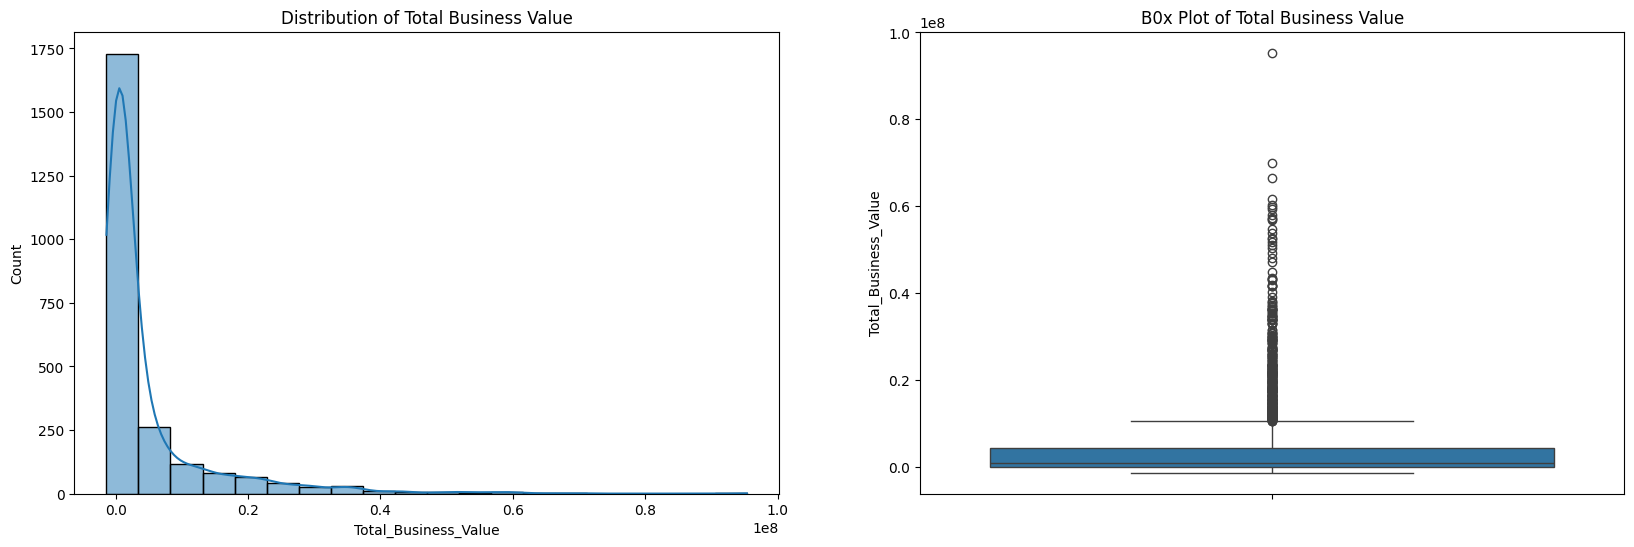

In [36]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(unique_drivers['Total_Business_Value'],kde=True, bins=20)
plt.title('Distribution of Total Business Value')

plt.subplot(122)
sns.boxplot(unique_drivers['Total_Business_Value'])
plt.title('B0x Plot of Total Business Value')
plt.show()

 **Insights**
  - The driver `Total Businees Value` distribution shows most drivers bisiness value are low, close to zero.

> Persentage of  Drivers `Has Left`, `Quarterly_Rating_Increase`, `Monthly_Income_Increase`, `Gender` and given below.

In [37]:
n = ['Has_left','Gender','Education_Level','Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_Increase','Monthly_Income_Increase']

for i in n:
    print('><><><><><><><><><><><><><><><><><><><><><><\n')
    print((unique_drivers[i].value_counts(normalize=True)*100).round(2))

><><><><><><><><><><><><><><><><><><><><><><

Has_left
Left      67.87
Active    32.13
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><

Gender
Male      59.13
Female    40.87
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><

Education_Level
2    33.68
1    33.39
0    32.93
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><

Joining_Designation
1    43.09
2    34.23
3    20.71
4     1.51
5     0.46
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><

Grade
2    35.91
1    31.12
3    26.17
4     5.80
5     1.01
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><

Quarterly_Rating
1    73.25
2    15.20
3     7.06
4     4.49
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><

Quarterly_Rating_Increase
0    84.96
1    15.04
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><

Monthly_Income_Increase
0  

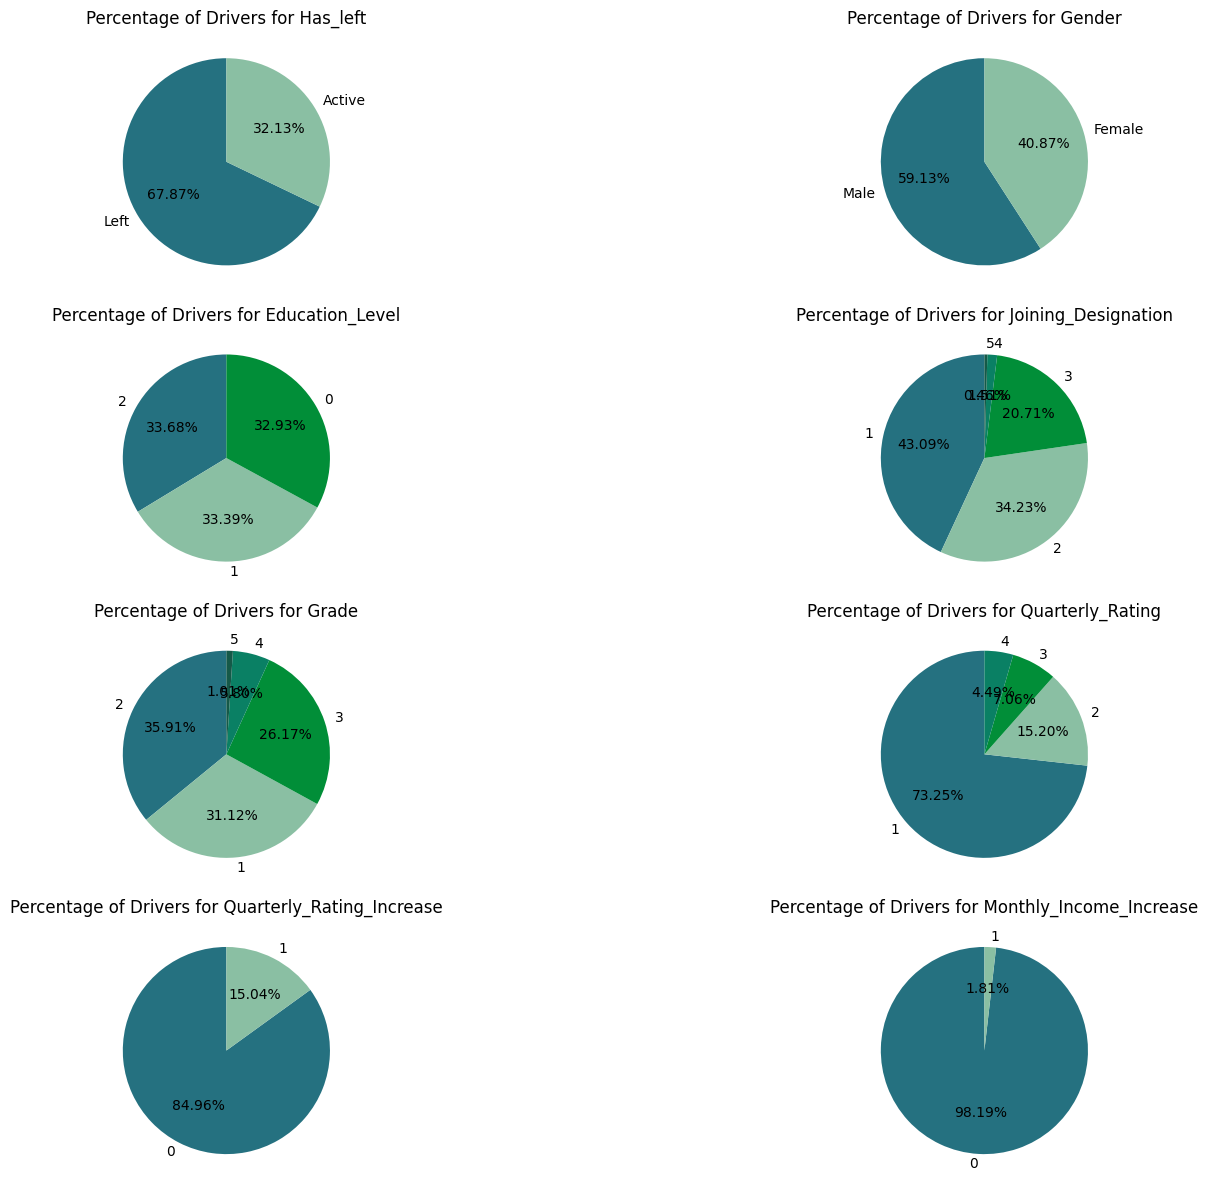

In [38]:
n = ['Has_left','Gender','Education_Level','Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_Increase','Monthly_Income_Increase']

sub_plot = 1 
plt.figure(figsize=(20,12))
for i in n:
    plt.subplot(4, 2, sub_plot)    
    plt.pie(unique_drivers[i].value_counts(),labels=unique_drivers[i].value_counts().index, autopct='%1.2f%%', startangle=90,colors=['#257180','#8ABFA3','#018e38','#0a8064','#155948'])
    plt.title(f'Percentage of Drivers for {i}') 
    sub_plot += 1  

plt.tight_layout()  
plt.show()

 **Insights**
  - More drivers have left the company, with a turnover rate of 67%.
  - Only 15.04% of drivers have improved their quarterly rating, meaning very few drivers have increased their ratings."
  - Only 1.81% of drivers have seen an increase in their monthly salary.
  - 59% of drivers are male while female constitutes around 40%.
  - 33% of drivers have completed graduation and 12+ education
  - 43% of drivers have 1 as joining_designation
  - Around 36% of drivers graded as 2
  - Around 73% of drivers rated as 1 on last quarter

> **Number of drivers by `'Quarterly_Rating_Increase','Monthly_Income_Increase' and 'Gender'`**

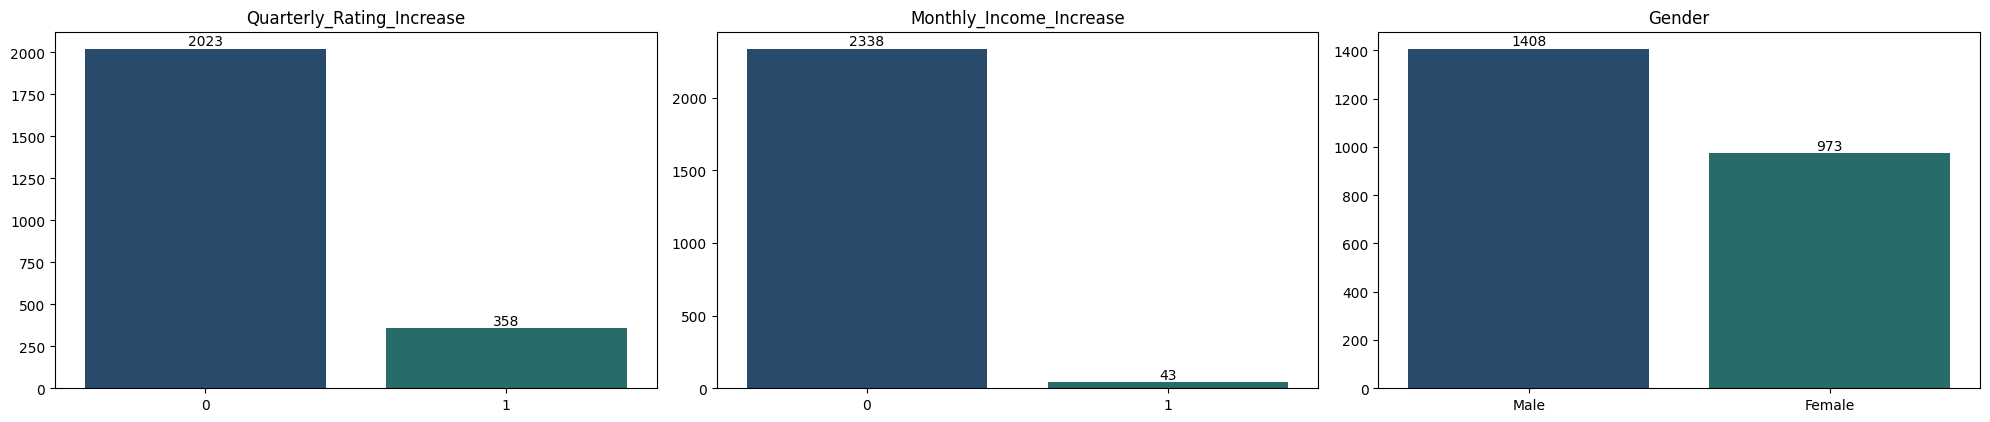

In [39]:
n = ['Quarterly_Rating_Increase','Monthly_Income_Increase','Gender']

for i in n:
    sub_plot = 1 
plt.figure(figsize=(20,12))
for i in n:
    plt.subplot(3, 3, sub_plot) 
    ax=sns.barplot(x=unique_drivers[i].value_counts().index,y=unique_drivers[i].value_counts().values,palette=sns.color_palette(["#1d4c76", "#1d7674"], as_cmap=True))
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'{i}')
    plt.xlabel('')
    sub_plot += 1  

plt.tight_layout()  
plt.show()

**Insights**
  - There are more drivers who have not had their quarterly ratings increased than the number of drivers who have.
  - Very few drivers have received a salary increase.
  - More males work as drivers at Ola compared to females.

In [40]:
n = ['Gender','Education_Level','Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_Increase','Monthly_Income_Increase']

for i in n:
    print("><><><><><><><><><><><><><><><><><><><><><><><\n")
    print((unique_drivers[i].value_counts(normalize=True)*100).round(2))

><><><><><><><><><><><><><><><><><><><><><><><

Gender
Male      59.13
Female    40.87
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><><

Education_Level
2    33.68
1    33.39
0    32.93
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><><

Joining_Designation
1    43.09
2    34.23
3    20.71
4     1.51
5     0.46
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><><

Grade
2    35.91
1    31.12
3    26.17
4     5.80
5     1.01
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><><

Quarterly_Rating
1    73.25
2    15.20
3     7.06
4     4.49
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><><

Quarterly_Rating_Increase
0    84.96
1    15.04
Name: proportion, dtype: float64
><><><><><><><><><><><><><><><><><><><><><><><

Monthly_Income_Increase
0    98.19
1     1.81
Name: proportion, dtype: float64


 **Insights**
- 59% of drivers are male while female constitutes around 40%
- 33% of drivers have completed graduation and 12+ education
- 43% of drivers have 1 as joining_designation
- Around 36% of drivers graded as 2
- Around 73% of drivers rated as 1 on last quarter
- Only 15% of drivers rating has been increased on quarterly

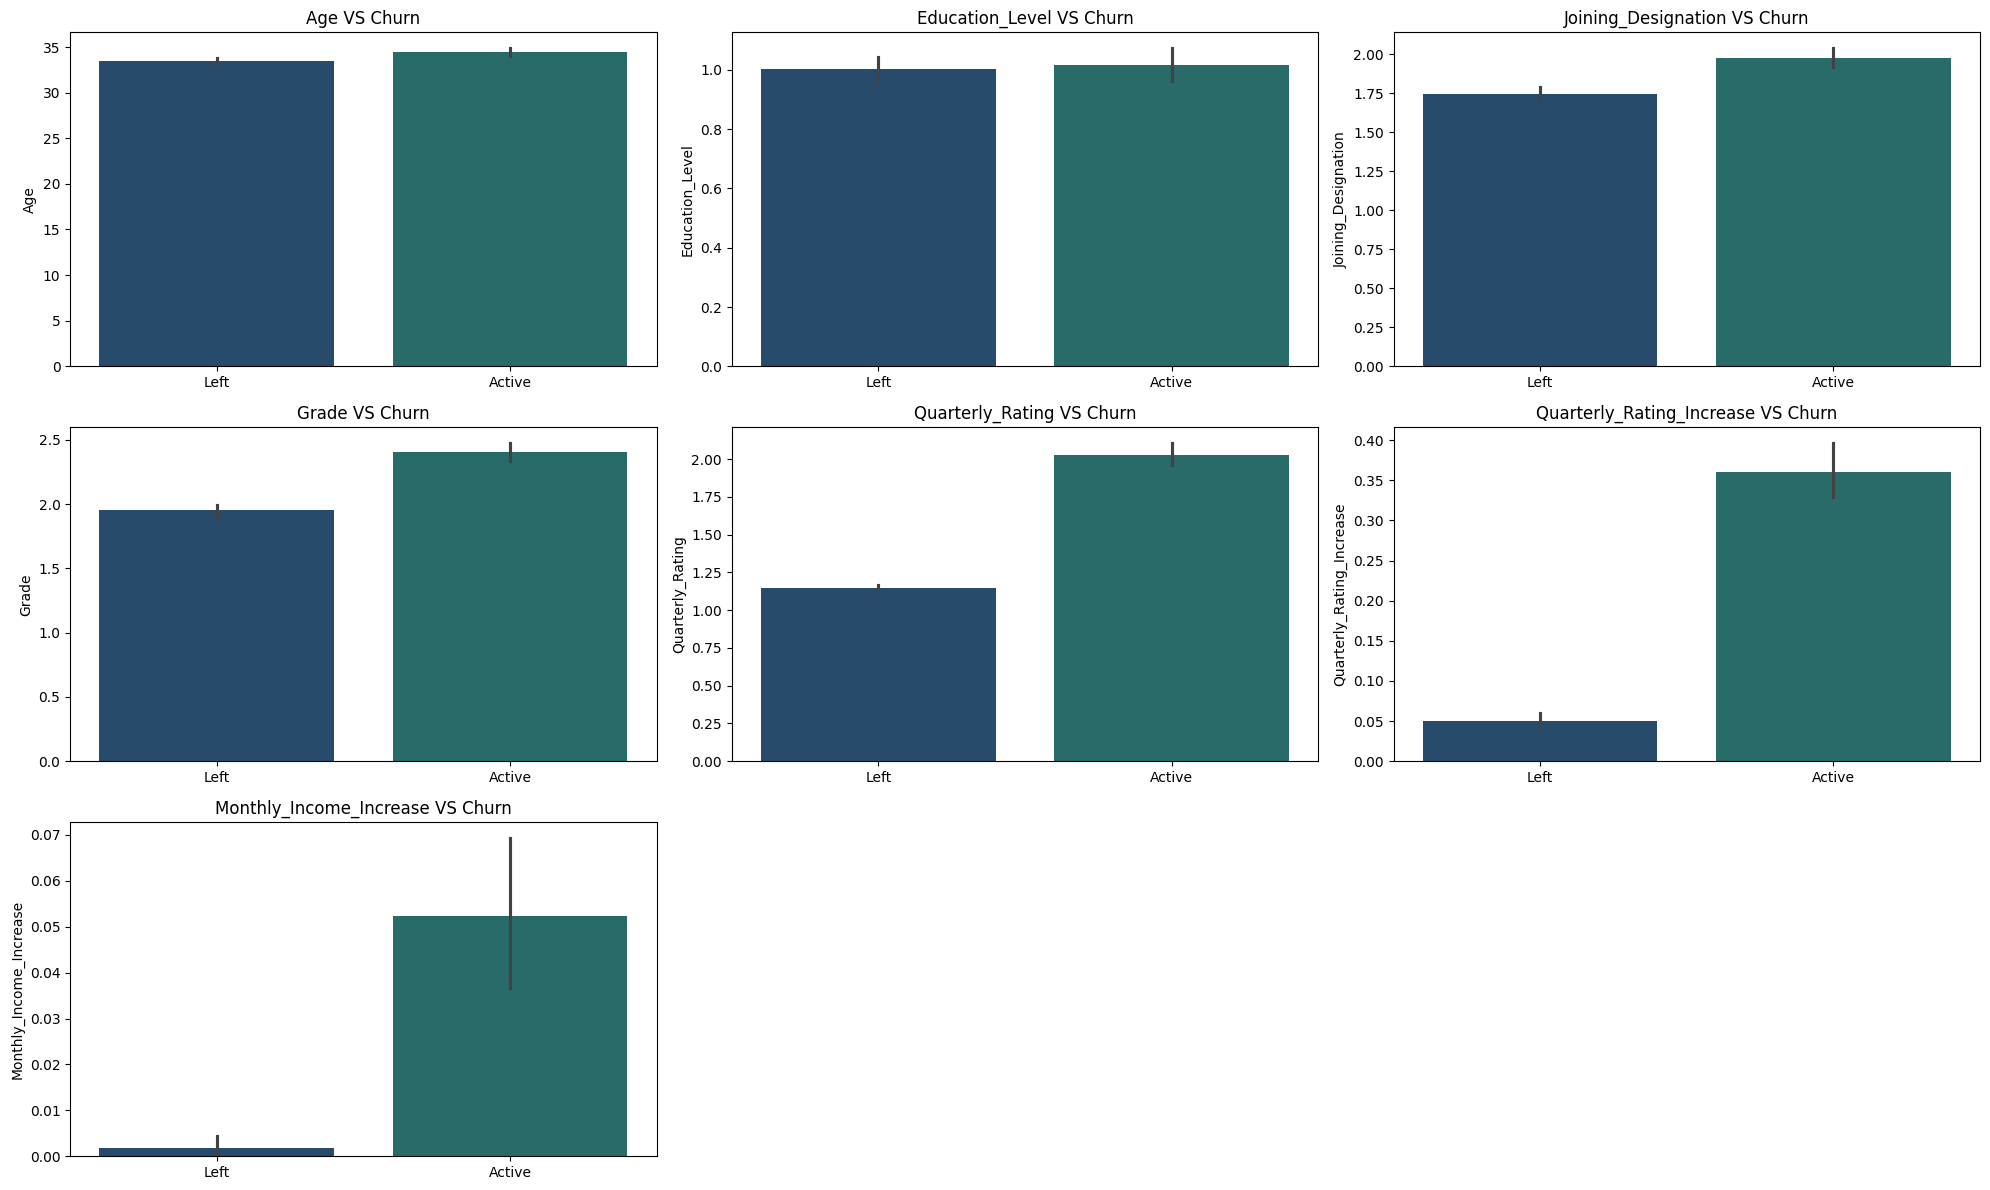

In [41]:
n = ['Age','Education_Level','Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_Increase','Monthly_Income_Increase']
sub_plot = 1 
plt.figure(figsize=(20,12))
for i in n:
    plt.subplot(3, 3, sub_plot) 
    sns.barplot(data=unique_drivers, x='Has_left',y=i,palette=sns.color_palette(["#1d4c76", "#1d7674"], as_cmap=True))
    plt.title(f'{i} VS Churn')
    plt.xlabel('')
    sub_plot += 1

plt.tight_layout()
plt.show()

**Insights**
  - `Age`: No major difference in age between employees who left and those who stayed.
  - `Education Level`: Education level is similar for both groups.
  - `Joining Designation`: Active employees tend to have slightly higher starting roles than those who left.
  - `Grade`: Active employees generally have a higher grade.
  - `Quarterly Rating`: Active employees receive higher ratings than those who left.
  - `Quarterly Rating Increase`: Active employees have a much higher increase in quarterly ratings.
  - `Monthly Income Increase`: Active employees see more monthly income growth than those who left.

## **--> Correlation and Relationships**

> **Correlation between Age and Income**

<Axes: >

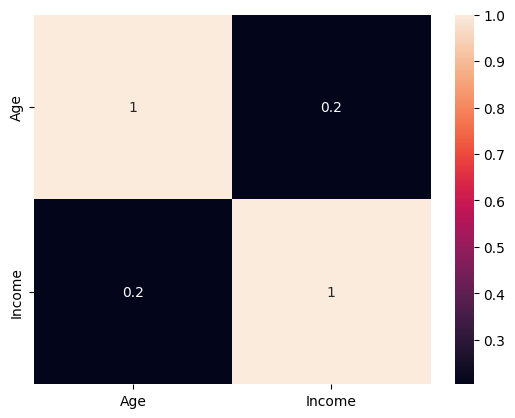

In [42]:
age_income_corr = unique_drivers[['Age', 'Income']].corr()
sns.heatmap(age_income_corr,annot=True)

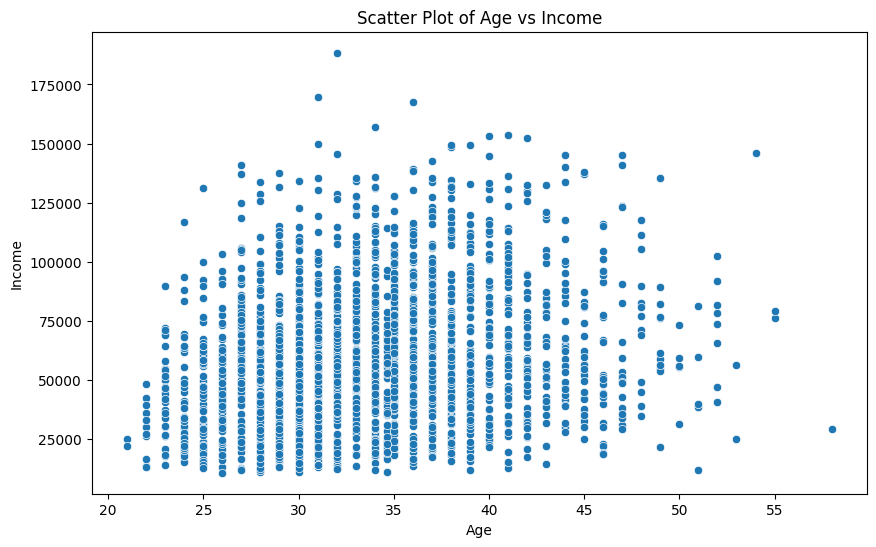

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=unique_drivers,x='Age',y='Income')
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

**Insights**
  - Older drivers generally earn higher incomes, though the increase is slight.
  - Age does not have a strong effect on income, as indicated by the scattered points.

> **Correlation between numaric columns**

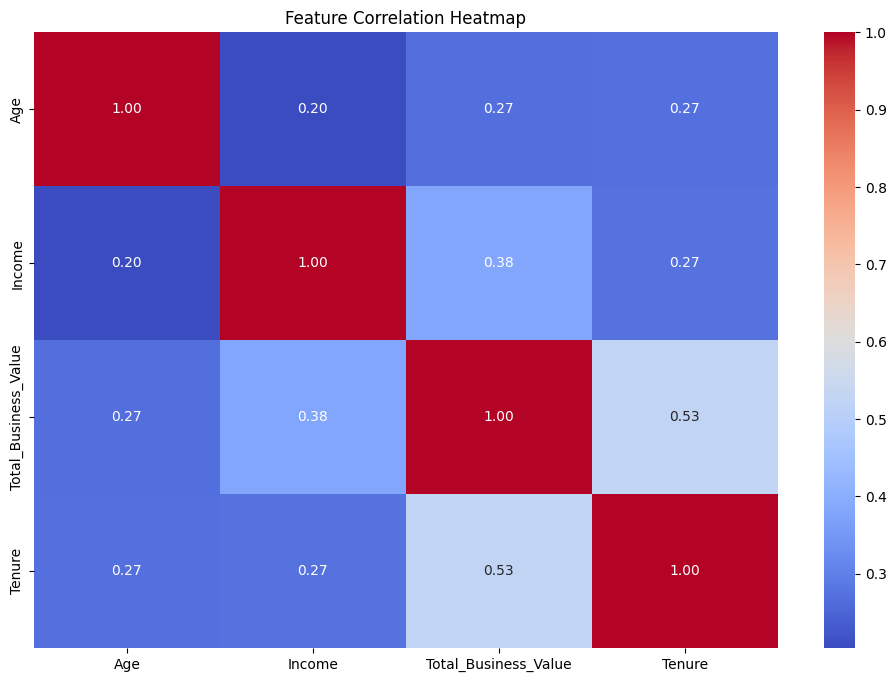

In [44]:
plt.figure(figsize=(12, 8))
col=['Age','Income','Total_Business_Value','Tenure']
correlation = unique_drivers[col].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

**Insights**
  - Total Business Value and Tenure have a moderate positive correlation (0.53), meaning longer-tenured employees tend to contribute more to business value
  - Income and Total Business Value show a moderate link (0.38), suggesting higher income may relate to better business performance.
  - Age has weak correlations with Total Business Value and Tenure (both 0.27), indicating older employees might have slightly higher tenure and business contributions.

> **Impact of Education_Level and City on Total Business Value**

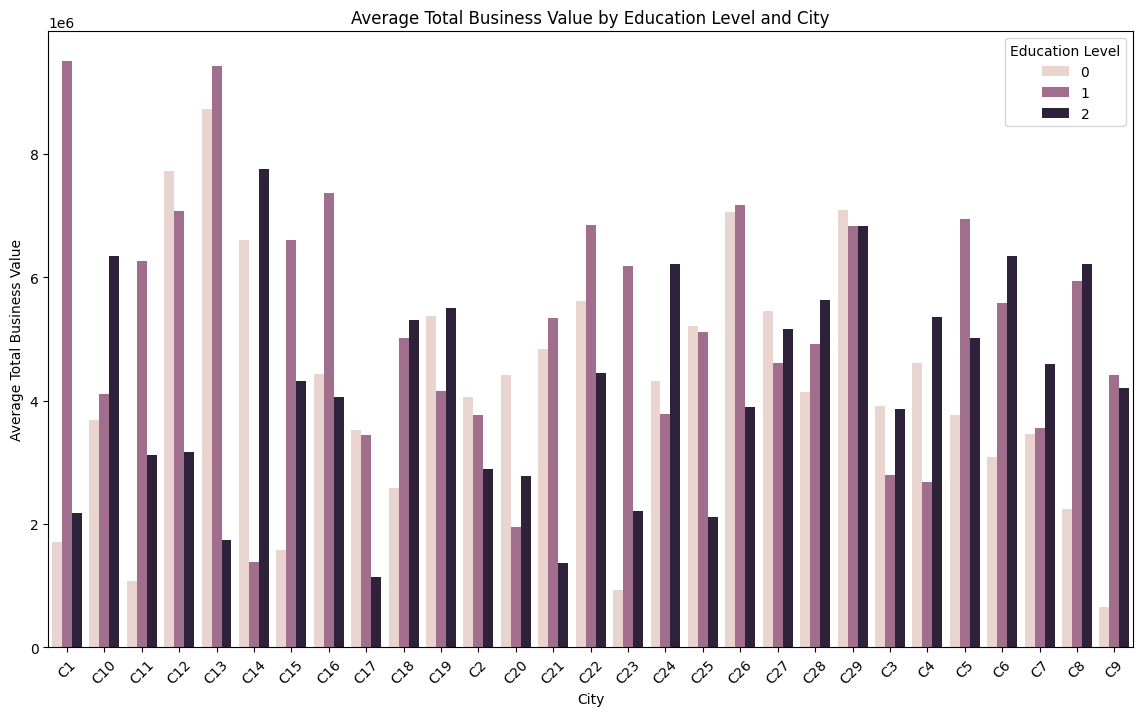

In [45]:
edu_city_business_value = unique_drivers.groupby(['Education_Level', 'City'])['Total_Business_Value'].mean().reset_index()
edu_city_business_value

plt.figure(figsize=(14, 8))
sns.barplot(data=edu_city_business_value, x='City', y='Total_Business_Value', hue='Education_Level')
plt.title('Average Total Business Value by Education Level and City')
plt.xlabel('City')
plt.ylabel('Average Total Business Value')
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.show()

**Insights**
  - Certain cities, like C12 and C13, show significantly higher business values.
  - Lower education levels sometimes correlate with higher business value, depending on the city.
  - Cities with lower average business values often have a mix of education levels, suggesting location may impact performance more than education.

> **Effect of Quarterly Rating on Tenure**

In [46]:
tenure_by_rating = unique_drivers.groupby('Quarterly_Rating')['Tenure'].mean().reset_index()
tenure_by_rating


,Quarterly_Rating,Tenure
0,1,321.062151
1,2,644.198630
2,3,662.750000
3,4,546.800000


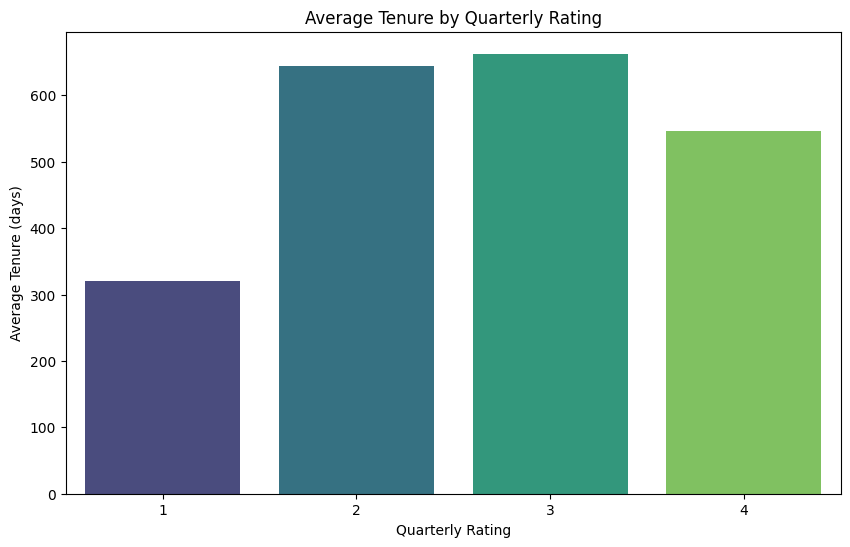

In [47]:

plt.figure(figsize=(10, 6))
sns.barplot(data=tenure_by_rating, x='Quarterly_Rating', y='Tenure', palette='viridis')
plt.title('Average Tenure by Quarterly Rating')
plt.xlabel('Quarterly Rating')
plt.ylabel('Average Tenure (days)')
plt.show()

**Insinghts**
  - Drivers with higher ratings (2 and 3) stay with the company longer, as seen by their higher average tenures.
  - Rating 1 is associated with shorter tenures, possibly indicating lower engagement or satisfaction.
  - The trend suggests that better ratings may encourage drivers to remain employed longer

>   `><><><><><><><><><><><><><><><><><><><><><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><`

# **`Summary of Key Insights`**

- **Driver Churn Rate**: About 68% of drivers left Ola, indicating a high churn rate.

### **Driver Demographics:**
- **`Age`**: Most drivers are between 30 and 40 years old.
- **`Gender`**: Around 59% of drivers are male, while 41% are female.
- **`Education`**: 33% of drivers are graduates, and another 33% have completed 12th grade.

### **Income and Tenure:**
- **`Income`**: Most drivers earn between 40,000 and 75,000 per month, with a few earning over 125,000.
- **`Tenure`**: The average driver tenure is around 358 days, and most drivers have shorter tenures (less than 500 days).
- **`Income and Tenure Link`**: Older drivers tend to have slightly higher incomes, but age and income don’t show a strong relationship overall. Drivers with higher incomes contribute more to business value.

### **Performance and Ratings:**
- **`Quarterly Ratings`**: 73% of drivers have a low quarterly rating of 1, and only 15% have seen improvements in their rating over time.
- **`Income Increases`**: Very few drivers (around 2%) experienced an increase in monthly income.
- **`Retention by Rating`**: Drivers with higher quarterly ratings (2 and 3) tend to stay longer, suggesting that better-rated drivers are more likely to remain with Ola.

### **City and Business Value:**
- Certain cities (like C12 and C13) show higher business values, meaning drivers in these cities contribute more revenue.
- Education level does not significantly impact business value; however, some cities with high business values have a mix of education levels, suggesting location influences driver performance more than education.

### **Overall Patterns:**
- **`Drivers Who Left:`** Most of the drivers who left had lower ratings, lower income growth, and shorter tenures.
- **`Active Drivers`**: Active drivers are likely to have higher grades, higher ratings, and are slightly more likely to see income growth over time.

>   `><><><><><><><><><><><><><><><><><><><><><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><`

## **`Recommendations`**

### **Enhance Earnings and Growth Opportunities**
- **`Performence-Based Incentives` :-** Offer higher incentives for drivers who maintain good ratings.
- **`Inacome Increases` :-** Increase driver earnings for top-rated drivers and those with high business value contributions.

### **Targeted Retention Programs in High-Churn Cities**
- **`City-specific initiatives` :-** Cities with high driver turnover should have special retention programs, like exclusive incentives, flexible shift options.

### **Focus on Improving Driver Ratings**
- **`Customer feedback analysis` :-** Analyze feedback that leads to low ratings and provide insights to drivers for improvement.
- **`Reward High Ratings` :-**   Reward drivers who consistently earn high ratings with perks like priority on high-demand rides or extra incentives.

### **Encourage Female Driver Recruitment and Retention**
- **`Flexible Scheduling` :-** Provide options like preferred hours for female drivers to ensure a safer.
- **`Female-focused Incentives` :-** Offer tailored incentives for female drivers, such as safety resources or female-only events to build a strong support network.

### **Increase Tenure-based Benefits**
- **`Tenure Bonuses` :-** Implement bonuses at milestones (e.g., six months, one year) to motivate drivers to remain longer.



>   `><><><><><><><><><><><><><><><><><><><><><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><`

# **`Conclusion`**
  This analysis shows that Ola has a high driver churn rate, with many drivers leaving within a year. Low ratings, limited income growth, and few advancement opportunities are main reasons for drivers leaving. Drivers who stay longer tend to have higher ratings and better earnings, especially in certain cities.

To reduce churn, Ola should focus on increasing driver satisfaction through better pay, growth paths, and stronger support. Targeted efforts in high-churn cities and identifying at-risk drivers can also help keep more drivers. These actions can help Ola build a more loyal and stable driver team.

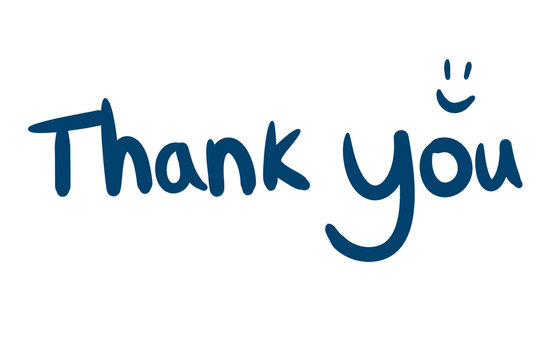